## 1. 분산분석 리뷰

- 정규성 검정

In [ ]:
from scipy import stats
stats.shapiro(변수) #샘플 수가 30 보다 크면 CLT 가정
#stats.normaltest(변수)

- 바틀렛 검정: 정규분포를 따르는 두 집단 분산 확인

In [ ]:
from scipy.stats import bartlett
bartlett(변수1, 변수2)  #등분산에 대한 체크

BartlettResult(statistic=0.010694419494504868, pvalue=0.9176345390862316)

- 예

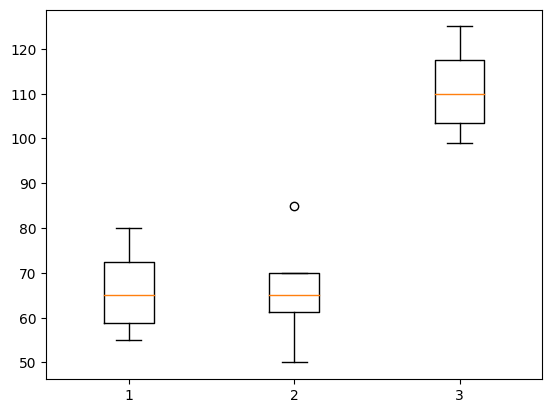

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

group1 = [60, 70, 80, 55]
group2 = [50, 65, 85, 65]
group3 = [105, 115, 99, 125]
plot_data = [group1, group2, group3]

ax = plt.boxplot(plot_data)
plt.show()


In [ ]:
stats.f_oneway(group1, group2, group3)

values = [60, 70, 80, 55 ,50, 65, 85, 65, 105, 115, 99, 125]
group = [1,1,1,1,2,2,2,2,3,3,3,3]

tukey = pairwise_tukeyhsd(endog=values,     # Data
                          groups=group,   # Groups
                          alpha=0.05)          # Significance level
tukey.summary()              # See test summary


group1,group2,meandiff,p-adj,lower,upper,reject
1,2,0.0,1.0,-24.4422,24.4422,False
1,3,44.75,0.0016,20.3078,69.1922,True
2,3,44.75,0.0016,20.3078,69.1922,True


- 분산 분석을 위한 데이터프레임 처리

LabelEncoder: 범주형 변수의 인코딩

In [ ]:
import pandas as pd
data = pd.read_csv("voter1.csv")
data.category.dtype
categorical = [ i for i in data.columns if data[ i ].dtype == "O"]
numeric = [ i for i in data.columns if data[ i ].dtype != "O"]

print( data[ categorical ]  )

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit( data[ categorical])
label.transform( data[ categorical])
label.classes_

    category
0          B
1          E
2          C
3          E
4          A
..       ...
995        E
996        A
997        E
998        E
999        C

[1000 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [ ]:
data["classes"] = label.transform( data[ categorical])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
data.classes

0      1
1      4
2      2
3      4
4      0
      ..
995    4
996    0
997    4
998    4
999    2
Name: classes, Length: 1000, dtype: int64

In [ ]:
import pandas as pd
voter = pd.read_csv('voter1.csv')
voter.groupby("category")["age"].mean()

category
A    48.886364
B    47.551020
C    48.127049
D    48.860000
E    47.467961
Name: age, dtype: float64

In [ ]:
voter.groupby("category").nth(5)

In [ ]:
idx = voter["age"].between(35, 40)
voter[ idx ]

,age,category
5,40,E
8,39,E
14,37,A
15,36,E
18,37,E
...,...,...
961,37,B
963,37,E
984,40,B
994,40,C


In [ ]:
groups = voter.groupby("category").groups

{'A': [4, 7, 14, 21, 49, 53, 59, 78, 95, 98, 135, 136, 162, 203, 227, 264, 278, 289, 326, 335, 345, 373, 430, 480, 484, 491, 516, 587, 602, 684, 692, 708, 715, 761, 776, 826, 828, 832, 853, 897, 942, 951, 986, 996], 'B': [0, 9, 19, 22, 23, 42, 50, 56, 62, 76, 105, 108, 119, 120, 124, 126, 131, 134, 138, 143, 152, 167, 171, 178, 182, 184, 202, 206, 211, 213, 229, 233, 236, 238, 242, 243, 245, 249, 253, 259, 261, 265, 266, 281, 287, 290, 294, 299, 303, 312, 314, 320, 328, 332, 333, 340, 349, 379, 383, 389, 394, 409, 411, 412, 420, 427, 438, 456, 457, 464, 469, 472, 476, 478, 479, 486, 488, 492, 497, 498, 508, 518, 521, 534, 536, 552, 555, 557, 568, 574, 601, 607, 609, 615, 620, 624, 625, 628, 636, 646, ...], 'C': [2, 10, 24, 28, 31, 32, 38, 40, 44, 45, 47, 54, 55, 58, 63, 71, 74, 83, 87, 88, 89, 91, 100, 104, 109, 110, 111, 113, 114, 117, 121, 123, 128, 132, 133, 139, 144, 145, 148, 155, 156, 158, 159, 168, 169, 172, 173, 188, 191, 195, 209, 210, 217, 218, 220, 223, 224, 231, 235, 240, 2

In [ ]:
voter_age = voter['age']
voter_cat = voter['category']
voter_age

0      51
1      49
2      51
3      48
4      56
       ..
995    47
996    40
997    50
998    51
999    43
Name: age, Length: 1000, dtype: int64

In [ ]:
# Extract individual groups
A = voter_age[groups["A"]]    #groups["A"], A키값에 대한 실제 값들, A그룹에 속하는 위치의 값들을 선택, 인덱싱
B = voter_age[groups["B"]]
C = voter_age[groups["C"]]
D = voter_age[groups["D"]]
E = voter_age[groups["E"]]

- 분산분석

In [ ]:
stats.bartlett(A,B,C,D,E) #정규분포 따르지 않고, 등분산을 만족하지 않는 경우, Kruskal Wallis test 사용
#정규분포 따르고, 등분산을 만족하지 않는 경우, Welch's test 사용

BartlettResult(statistic=406.6960562289963, pvalue=9.94131729362807e-87)

- 각 경우 비교

In [ ]:
stats.kruskal( A,B,C,D,E)

KruskalResult(statistic=978.6208219359503, pvalue=1.533414952159139e-210)

In [ ]:
stats.ttest_ind( A, B, equal_var=False )  #equal_var=False 로 하면 Welch's Test

TtestResult(statistic=4.168367345131559, pvalue=3.160191763072083e-05, df=2822.2929384671666)

In [ ]:
!pip install pingouin
from pingouin import welch_anova

aov = welch_anova(dv='age', between='category', data=voter)
aov

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 3.3 MB/s eta 0:00:00


,Source,ddof1,ddof2,F,p-unc,np2
0,category,4,167.460187,1.734004,0.144782,0.007083


In [ ]:
# ANOVA
stats.f_oneway(A, B, C, D, E)

F_onewayResult(statistic=1.7744689357329695, pvalue=0.13173183201930463)

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=voter_age,     # Data
                          groups=voter_cat,   # Groups
                          alpha=0.05)          # Significance level

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,-1.3353,0.5848,-3.8242,1.1535,False
A,C,-0.7593,0.9062,-3.1315,1.6129,False
A,D,-0.0264,1.0,-3.0202,2.9674,False
A,E,-1.4184,0.4319,-3.6932,0.8564,False
B,C,0.576,0.8362,-0.9362,2.0882,False
B,D,1.309,0.5571,-1.0622,3.6801,False
B,E,-0.0831,0.9998,-1.4374,1.2713,False
C,D,0.733,0.9003,-1.5154,2.9813,False
C,E,-0.6591,0.4976,-1.7847,0.4665,False
D,E,-1.392,0.3899,-3.5374,0.7533,False


## 2. 실습1: 미세먼지

In [76]:
import pandas as pd
data0 = pd.read_csv("2019Dustemission.csv", encoding="CP949")
data0.columns = ["date", "gangnam", "nowon", "mapo", "water", "yangcheon","eunpyung"]
data0

,date,gangnam,nowon,mapo,water,yangcheon,eunpyung
0,2019-01-01,982,6563,7706,531,2866,1009
1,2019-01-02,1007,6523,7346,480,2978,1064
2,2019-01-03,968,6664,7383,427,3070,985
3,2019-01-04,1035,6600,7297,316,3097,946
4,2019-01-05,1130,6282,7212,154,3052,937
...,...,...,...,...,...,...,...
360,2019-12-27,3550,4242,7629,11,1316,1275
361,2019-12-28,3762,4194,7568,35,1476,1343
362,2019-12-29,4333,4074,10828,3,1542,1441
363,2019-12-30,4435,4127,11062,85,1718,1503


In [77]:
stats.shapiro(data0.nowon)
stats.bartlett(data0.gangnam, data0.nowon, data0.yangcheon)

BartlettResult(statistic=np.float64(148.96038345255468), pvalue=np.float64(4.504677685384403e-33))

In [78]:
# ANOVA
stats.f_oneway(data0.gangnam, data0.nowon, data0.yangcheon)

F_onewayResult(statistic=np.float64(76.12422289751198), pvalue=np.float64(1.1227425016177243e-31))

In [79]:
# Kruskal Wallis
stats.kruskal(data0.gangnam, data0.nowon, data0.yangcheon)

KruskalResult(statistic=np.float64(130.18255953421), pvalue=np.float64(5.385380297356744e-29))

In [80]:
data1 =  pd.DataFrame()
data1["value"] = data0.gangnam
data1["region"]= "gangnam"

data2 =  pd.DataFrame()
data2["value"] = data0.nowon
data2["region"]= "nowon"

data3 =  pd.DataFrame()
data3["value"] = data0.yangcheon
data3["region"]= "yangcheon"

data4 = pd.concat([data1, data2, data3])

#다른 방법
data5 = pd.melt(data0, id_vars="date", value_vars=["gangnam", "nowon", "mapo", "water", "yangcheon","eunpyung"])

In [81]:
tukey = pairwise_tukeyhsd(endog=data4.value,     # Data
                          groups=data4.region,   # Groups
                          alpha=0.05)          # Significance level

tukey.summary()              # See test summary

group1,group2,meandiff,p-adj,lower,upper,reject
gangnam,nowon,607.5863,0.0,314.3399,900.8327,True
gangnam,yangcheon,-923.3452,0.0,-1216.5916,-630.0988,True
nowon,yangcheon,-1530.9315,0.0,-1824.1779,-1237.6851,True


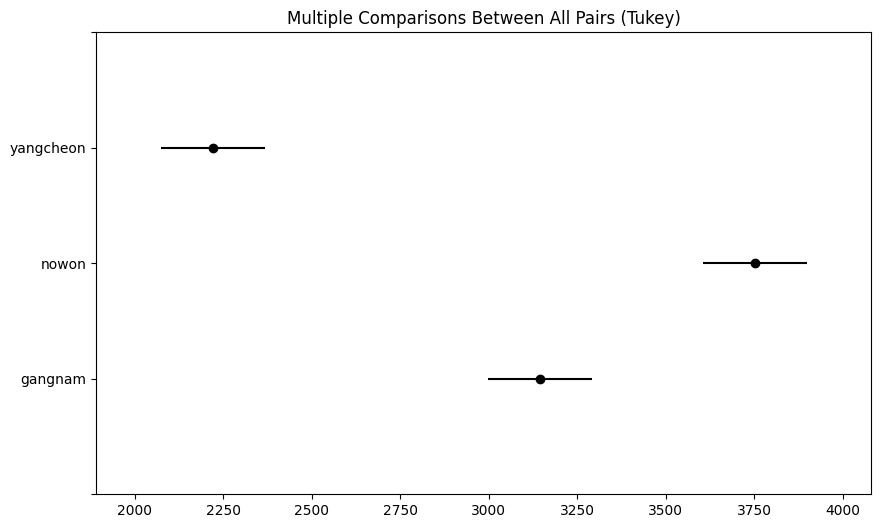

In [82]:
tukey.plot_simultaneous()    # Plot group confidence intervals
plt.show()

##3.실습2: 제조 데이터 적용

- train.csv를 통해 25개 실험에 대한 결과 확인
- CNC 장비 상태에 따른 각 결과값

In [48]:
data0 = pd.read_csv("train.csv")
data0

,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,1,aluminum,6,4.0,unworn,yes,yes
1,2,aluminum,20,4.0,unworn,yes,yes
2,3,aluminum,6,3.0,unworn,yes,yes
3,4,aluminum,6,2.5,unworn,no,NaN
4,5,aluminum,20,3.0,unworn,no,NaN
5,6,aluminum,6,4.0,worn,yes,no
6,7,aluminum,20,4.0,worn,no,NaN
7,8,aluminum,20,4.0,worn,yes,no
8,9,aluminum,15,4.0,worn,yes,no
9,10,aluminum,12,4.0,worn,yes,no


- 각 25개 경우에 대한 X변수 중 주요 변수
1.	M_CURRENT_FEEDRATE	스핀들 전류 (절삭 부하 관련)
2.	S_CurrentFeedback	전류 피드백 (가공 부하)
3.	S_DCBusVoltage	DC버스 전압 (전원 안정성)
4.	S_OutputVoltage	출력 전압
5.	S_OutputPower	출력 전력
6.	S_RatedTorque	정격 토크 (스핀들 강성 관련)
7.	M_COMMAND_FEEDRATE	명령 이송 속도 (가공 경로)
8.	CNC_ACC	진동/가속도 관련 (품질 영향 큼)
9.	Z_POSITION 또는 유사 변수	Z축 위치 변화 (깊이/치수 오차 관련)
10.	CycleTime, MachiningTime	가공 시간 (마모, 이상작동과 연결됨)

In [15]:
unworn = data0.query("tool_condition=='unworn'").No
worn = data0.query("tool_condition=='worn'").No

In [ ]:
!unzip data.zip

In [38]:
list_u = []

for i in unworn:
  num = str(i)
  if len(num) ==1:
    num = "0"+num

  temp = pd.read_csv("data/experiment_"+num+".csv")
  list_u.append(temp.M_CURRENT_FEEDRATE.values.tolist())

In [39]:
list_w = []

for i in worn:
  num = str(i)
  if len(num) ==1:
    num = "0"+num

  temp = pd.read_csv("data/experiment_"+num+".csv")
  list_w.append(temp.M_CURRENT_FEEDRATE.values.tolist())

In [40]:
list_u = [ item for sublist in list_u for item in sublist]
list_w = [ item for sublist in list_w for item in sublist]

In [27]:
import scipy.stats as stats

In [41]:
stats.shapiro(list_w)  #normality

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15465.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.7169714331377026), pvalue=np.float64(6.816534369279606e-95))

In [42]:
stats.bartlett(list_w, list_u) #등분산

BartlettResult(statistic=np.float64(34.271912254584024), pvalue=np.float64(4.792488457736048e-09))

In [43]:
# ANOVA
stats.f_oneway(list_u, list_w)

F_onewayResult(statistic=np.float64(34.569632556409815), pvalue=np.float64(4.153431842167494e-09))

In [44]:
# Kruskal Wallis
stats.kruskal(list_u, list_w)

KruskalResult(statistic=np.float64(188.0918429195431), pvalue=np.float64(8.295666980502335e-43))

In [45]:
data1 =  pd.DataFrame()
data1["value"] = list_u
data1["status"]= "unworn"

data2 =  pd.DataFrame()
data2["value"] = list_w
data2["status"]= "worn"

data3 = pd.concat([data1, data2])

In [47]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=data3.value,     # Data
                          groups=data3.status,   # Groups
                          alpha=0.05)          # Significance level

tukey.summary()              # See test summary

group1,group2,meandiff,p-adj,lower,upper,reject
unworn,worn,1.3143,0.0,0.8762,1.7525,True


## 4. 실습3: 개별 경우 확인

- 21 번 데이터: unworn, 프로세스완료, 육안검사 미통과

In [ ]:
# warning 무시
import warnings
warnings.filterwarnings('ignore')

In [63]:
#oneway anova
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data4 = pd.read_csv("data/experiment_21.csv")
data4.describe().iloc[:, 20:35]
data4["Z"] = data4.Z_ActualPosition - data4.Z_SetPosition
data4.M_CURRENT_PROGRAM_NUMBER.value_counts() #data4.Machining_Process.value_counts()

,count
M_CURRENT_PROGRAM_NUMBER,
0,705
1,699
4,264


In [ ]:
# Sort them into groups, according to column 1
group1 = data4.query("M_CURRENT_PROGRAM_NUMBER==0").Z.values
group2 = data4.query("M_CURRENT_PROGRAM_NUMBER==1").Z.values
group3 = data4.query("M_CURRENT_PROGRAM_NUMBER==4").Z.values

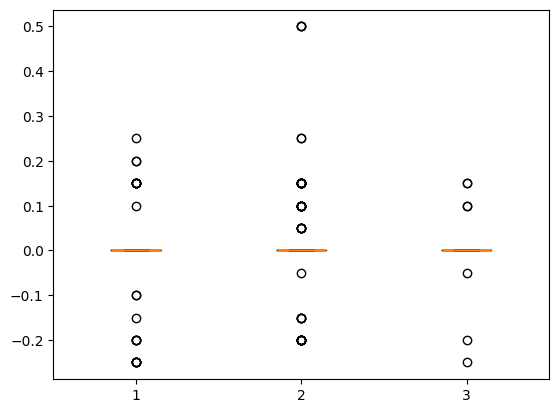

In [65]:
# matplotlib plotting
plot_data = [group1, group2, group3]
ax = plt.boxplot(plot_data)
plt.show()


In [66]:
stats.shapiro(group3)
stats.bartlett(group1, group2, group3)

BartlettResult(statistic=np.float64(209.38755544677446), pvalue=np.float64(3.40463096818001e-46))

In [67]:
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=np.float64(2.4944978956923642), pvalue=np.float64(0.08284630826483258))

In [68]:
stats.kruskal(group1, group2, group3)

KruskalResult(statistic=np.float64(7.250363496990224), pvalue=np.float64(0.026644254343135214))

In [70]:
tukey = pairwise_tukeyhsd(endog=data4.Z,     # Data
                          groups=data4.M_CURRENT_PROGRAM_NUMBER,   # Groups
                          alpha=0.05)          # Significance level

tukey.summary()              # See test summary

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.0049,0.0732,-0.0004,0.0102,False
0,4,0.0012,0.917,-0.0059,0.0083,False
1,4,-0.0037,0.4404,-0.0109,0.0034,False


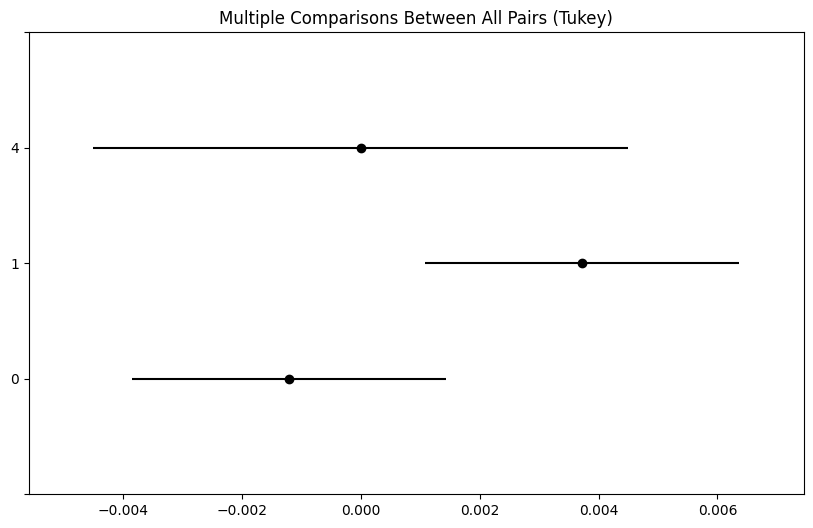

In [71]:
tukey.plot_simultaneous()    # Plot group confidence intervals
plt.show()

## 3. two way anova

In [72]:
data4.head()

,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity,X_SetAcceleration,X_CurrentFeedback,X_DCBusVoltage,X_OutputCurrent,X_OutputVoltage,...,S_DCBusVoltage,S_OutputCurrent,S_OutputVoltage,S_OutputPower,S_SystemInertia,M_CURRENT_PROGRAM_NUMBER,M_sequence_number,M_CURRENT_FEEDRATE,Machining_Process,Z
0,183.5,2.925,47.25,183.5,2.830,1.960,-0.284,2.790000e-19,329,0.0,...,0.000000e+00,332,0.0,0.000000e+00,15.5,1,2,50,Prep,0.0
1,183.5,2.825,47.25,183.5,2.680,2.060,-0.284,2.790000e-19,329,0.0,...,0.000000e+00,332,0.0,0.000000e+00,15.5,0,0,50,Prep,0.0
2,183.5,2.625,47.25,183.5,2.540,2.175,1.170,2.780000e-19,325,0.0,...,2.780000e-19,324,0.0,-8.590000e-07,15.5,0,0,50,Prep,0.0
3,183.0,2.435,31.65,183.0,2.415,2.310,-0.230,2.790000e-19,329,0.0,...,0.000000e+00,332,0.0,-6.290000e-06,15.5,4,0,50,Prep,0.0
4,183.0,2.400,37.85,183.0,2.305,2.460,-0.230,2.790000e-19,329,0.0,...,0.000000e+00,332,0.0,-6.290000e-06,15.5,0,0,50,Prep,0.0


In [73]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 모델 설정
model = 'Z ~M_CURRENT_PROGRAM_NUMBER+Machining_Process+M_CURRENT_PROGRAM_NUMBER*Machining_Process'

# 모델 피팅
two_anova = ols(model, data=data4).fit()

# 결과 테이블 확인
anova_lm(two_anova)

,df,sum_sq,mean_sq,F,PR(>F)
Machining_Process,8.0,0.174339,0.021792,12.897447,3.772214e-18
M_CURRENT_PROGRAM_NUMBER,1.0,0.000012,0.000012,0.007148,9.326335e-01
M_CURRENT_PROGRAM_NUMBER:Machining_Process,8.0,0.003370,0.000421,0.249303,9.811085e-01
Residual,1650.0,2.787943,0.001690,NaN,NaN


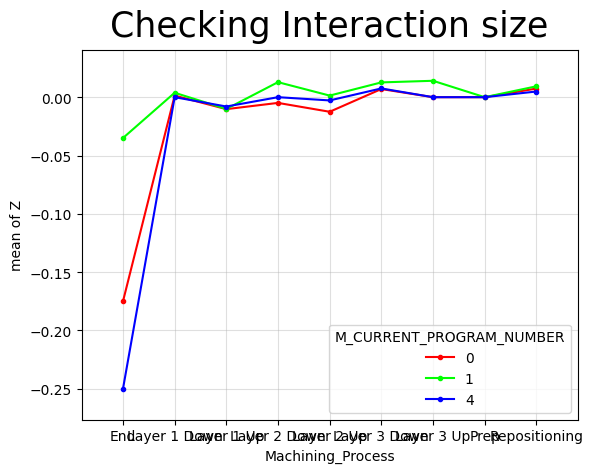

In [75]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=data4['Machining_Process'], trace = data4['M_CURRENT_PROGRAM_NUMBER'], response=data4['Z'])
plt.title("Checking Interaction size", fontsize = 25, pad = 10)
plt.grid(alpha = 0.4)
#각 직선이 평행이동한 구간은 Interaction effect가 없고, 다른 패턴을 보이는 경우에는 있는 것으로 해석